In [1]:
! nvidia-smi

Wed Apr 17 13:03:00 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 551.61                 Driver Version: 551.61         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4070 Ti   WDDM  |   00000000:01:00.0 Off |                  N/A |
|  0%   32C    P8             10W /  285W |   10933MiB /  12282MiB |     16%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## Install Diffusers library and other requirements


In [2]:
! pip install peft xformers bitsandbytes transformers accelerate -q

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.2.0+cu121 requires torch==2.2.0+cu121, but you have torch 2.2.2 which is incompatible.
torchvision 0.17.0 requires torch==2.2.0, but you have torch 2.2.2 which is incompatible.


In [3]:
! pip install git+https://github.com/huggingface/diffusers.git -q

In [4]:
! wget https://raw.githubusercontent.com/huggingface/diffusers/main/examples/dreambooth/train_dreambooth_lora.py

"wget" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [5]:
# To have correctly configured the versions of the different libraries in the anaconda kernel to use cuda, these are the ones I have used
! pip install torch==2.2.0 torchvision==0.17.0 torchaudio==2.2.0 --index-url https://download.pytorch.org/whl/cu121

Looking in indexes: https://download.pytorch.org/whl/cu121
  Using cached https://download.pytorch.org/whl/cu121/torch-2.2.0%2Bcu121-cp311-cp311-win_amd64.whl (2454.8 MB)
  Attempting uninstall: torch
    Found existing installation: torch 2.2.2
    Uninstalling torch-2.2.2:
      Successfully uninstalled torch-2.2.2


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xformers 0.0.25.post1 requires torch==2.2.2, but you have torch 2.2.0+cu121 which is incompatible.


**DATASET**

In [6]:
DATASET_FOLDER_NAME = "fotos"  # Complete with your own dataset folder name

In [7]:
from PIL import Image

def image_grid(imgs, rows, cols, resize=256):
    assert len(imgs) == rows * cols

    if resize is not None:
        imgs = [img.resize((resize, resize)) for img in imgs]
    w, h = imgs[0].size
    grid = Image.new("RGB", size=(cols * w, rows * h))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i % cols * w, i // cols * h))
    return grid

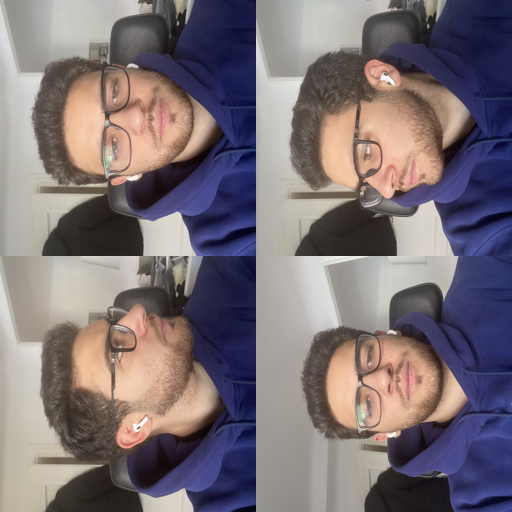

In [8]:
import glob

imgs = [Image.open(path) for path in glob.glob(f"./{DATASET_FOLDER_NAME}/*.jpg")][:10]
image_grid(imgs, 2, 2)

In [9]:
from diffusers import AutoPipelineForText2Image
from diffusers import EulerAncestralDiscreteScheduler
import torch

import warnings
warnings.filterwarnings('ignore')

A matching Triton is not available, some optimizations will not be enabled
Traceback (most recent call last):
  File "c:\Users\hugoc\anaconda3\Lib\site-packages\xformers\__init__.py", line 55, in _is_triton_available
    from xformers.triton.softmax import softmax as triton_softmax  # noqa
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\hugoc\anaconda3\Lib\site-packages\xformers\triton\softmax.py", line 11, in <module>
    import triton
ModuleNotFoundError: No module named 'triton'


In [11]:
! wget https://raw.githubusercontent.com/huggingface/diffusers/main/examples/dreambooth/train_dreambooth_lora_sdxl.py

"wget" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [10]:
! python train_dreambooth_lora.py \ 
  --pretrained_model_name_or_path="CompVis/stable-diffusion-v1-4" \
  --instance_data_dir="./fotos" \
  --output_dir="./trained_model" \
  --instance_prompt="a photo of a person named [Your Name]" \
  --seed=42 \
  --resolution=512 \
  --mixed_precision="fp16" \
  --train_batch_size=1 \
  --gradient_accumulation_steps=4 \
  --max_train_steps=500

SyntaxError: cannot assign to expression (4254169851.py, line 2)